# Benchmark using [scIB](https://github.com/theislab/scib/tree/main)

Code to run all different models comes from [here](https://scib-metrics.readthedocs.io/en/stable/notebooks/lung_example.html).

In [1]:
# Load packages
import numpy as np
import pandas as pd
import scanpy as sc
import scib
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=PendingDeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Load data
data_path = '../../data/processed/immune_cells/merged/Oetjen_merged.h5ad'
adata = sc.read(data_path, cache=True)

adata.obs["batch"] = adata.obs["patientID"]
print(adata.shape)

(14779, 10462)


### Unintegrated

In [3]:
# Unintegrated
sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor="cell_ranger")
sc.tl.pca(adata, n_comps=30, use_highly_variable=True)
sc.pp.neighbors(adata)

adata_hvg = adata[:, adata.var.highly_variable].copy()

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


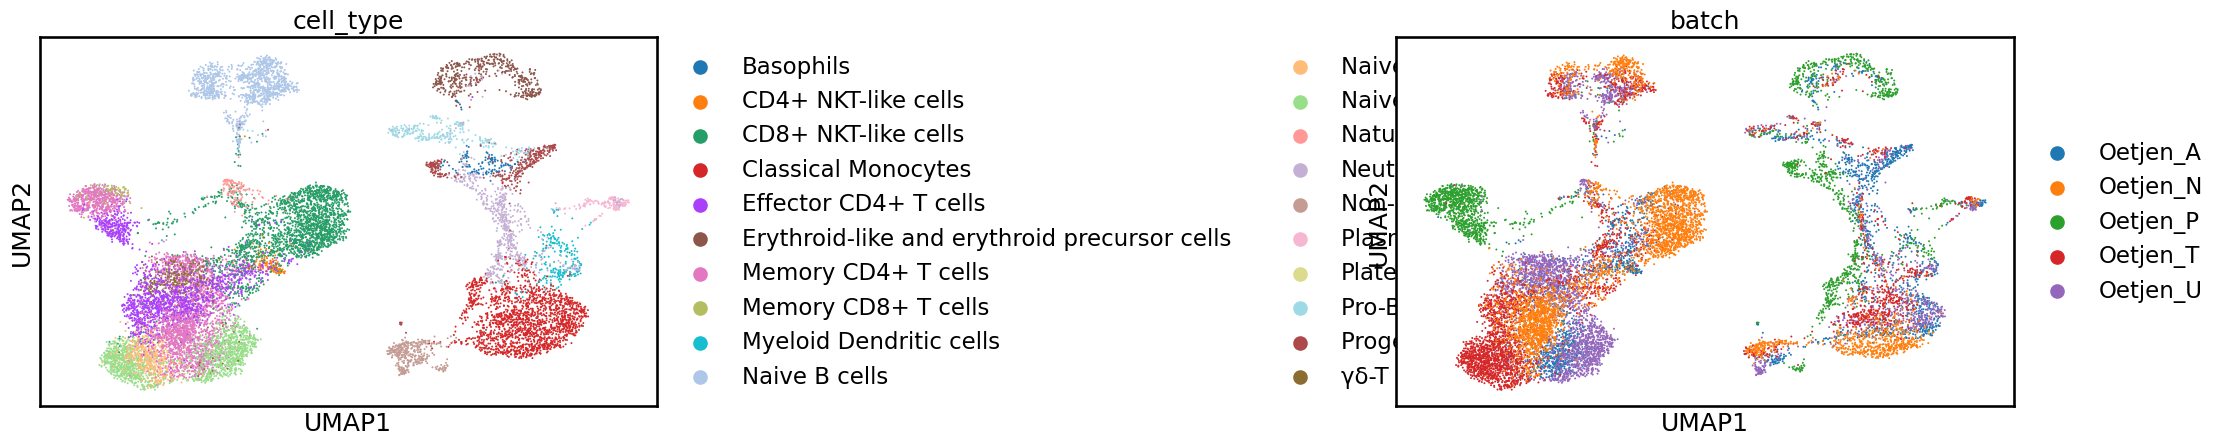

In [4]:
sc.tl.umap(adata_hvg)
sc.pl.umap(adata_hvg, color=["cell_type", "batch"], wspace=1)

In [5]:
metrics_hvg = scib.metrics.metrics(
        adata,
        adata_hvg,
        "batch", 
        "cell_type",
        embed="X_pca",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep X_pca
Compute neighbors on rep X_pca
Compute neighbors on rep X_pca
Compute neighbors on rep X_pca
Compute neighbors on rep X_pca
Isolated labels ASW...
Graph connectivity...


### [Scanorama](https://github.com/brianhie/scanorama)

In [6]:
# Scanorama
import scanorama

adata_scanorama = adata_hvg.copy()

# List of adata per batch
batch_cats = adata_scanorama.obs.batch.cat.categories
adata_list = [adata_scanorama[adata_scanorama.obs.batch == b].copy() for b in batch_cats]
scanorama.integrate_scanpy(adata_list)

adata_scanorama.obsm["Scanorama"] = np.zeros((adata_scanorama.shape[0], adata_list[0].obsm["X_scanorama"].shape[1]))
for i, b in enumerate(batch_cats):
    adata_scanorama.obsm["Scanorama"][adata_scanorama.obs.batch == b] = adata_list[i].obsm["X_scanorama"]

sc.pp.neighbors(adata_scanorama, use_rep="Scanorama")

Found 4000 genes among all datasets
[[0.         0.51579403 0.45200946 0.51406318 0.72739074]
 [0.         0.         0.0822695  0.62123131 0.51225566]
 [0.         0.         0.         0.4392435  0.34846336]
 [0.         0.         0.         0.         0.72665219]
 [0.         0.         0.         0.         0.        ]]
Processing datasets (0, 4)
Processing datasets (3, 4)
Processing datasets (1, 3)
Processing datasets (0, 1)
Processing datasets (0, 3)
Processing datasets (1, 4)
Processing datasets (0, 2)
Processing datasets (2, 3)
Processing datasets (2, 4)


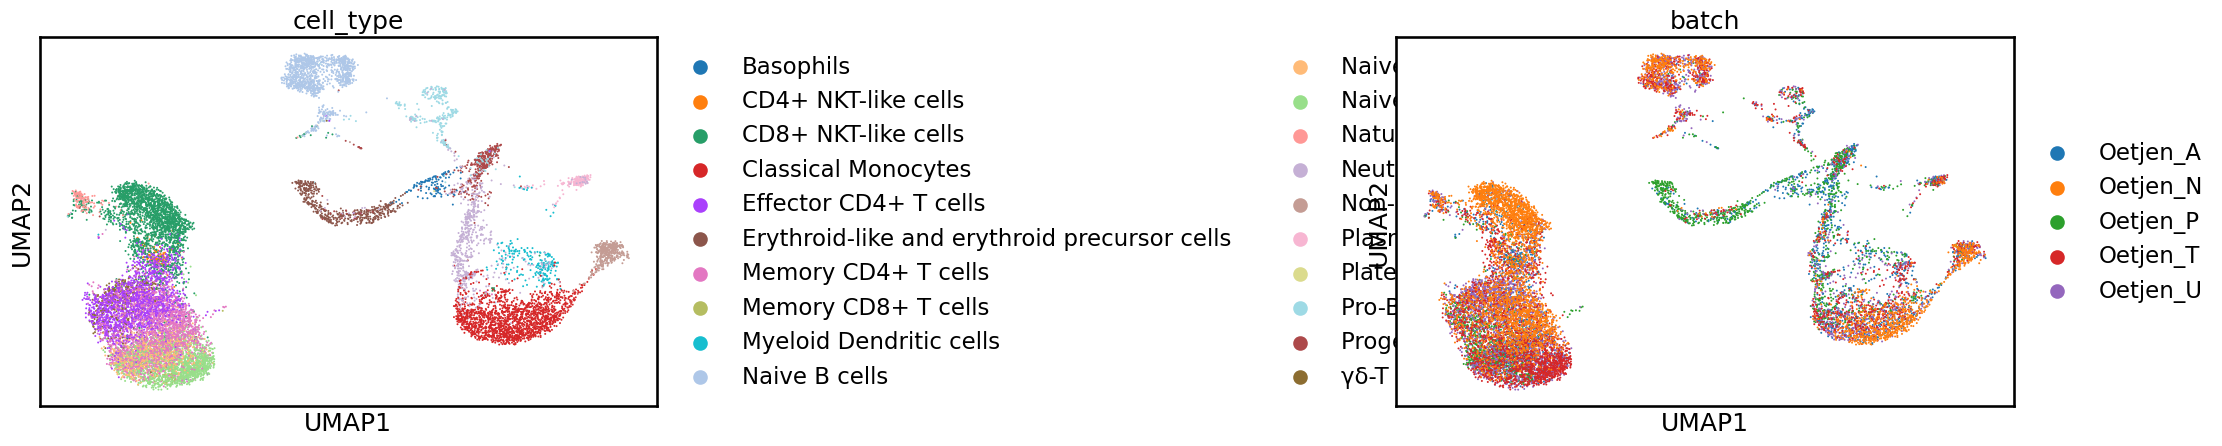

In [7]:
sc.tl.umap(adata_scanorama)
sc.pl.umap(adata_scanorama, color=["cell_type", "batch"], wspace=1)

In [8]:
metrics_scanorama = scib.metrics.metrics(
        adata,
        adata_scanorama,
        "batch", 
        "cell_type",
        embed="Scanorama",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_scanorama

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep Scanorama
Compute neighbors on rep Scanorama
Compute neighbors on rep Scanorama
Compute neighbors on rep Scanorama
Compute neighbors on rep Scanorama
Isolated labels ASW...
Graph connectivity...


### [Harmony](https://github.com/lilab-bcb/harmony-pytorch)

In [9]:
# Harmony
from harmony import harmonize

adata_harmony = adata_hvg.copy()

adata_harmony.obsm["Harmony"] = harmonize(adata_harmony.obsm["X_pca"], adata_harmony.obs, batch_key="batch")

sc.pp.neighbors(adata_harmony, use_rep="Harmony")

	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
Reach convergence after 5 iteration(s).


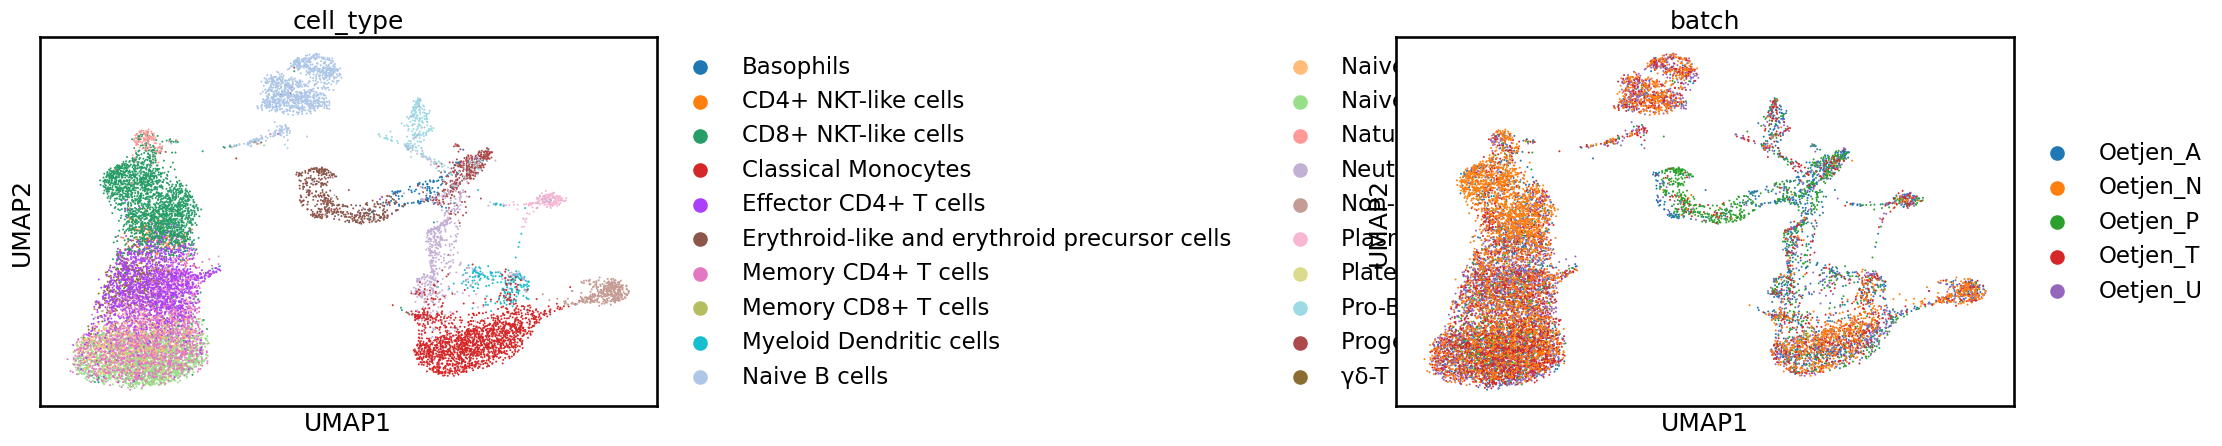

In [10]:
sc.tl.umap(adata_harmony)
sc.pl.umap(adata_harmony, color=["cell_type", "batch"], wspace=1)

In [11]:
metrics_harmony = scib.metrics.metrics(
        adata,
        adata_harmony,
        "batch", 
        "cell_type",
        embed="Harmony",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_harmony

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep Harmony
Compute neighbors on rep Harmony
Compute neighbors on rep Harmony
Compute neighbors on rep Harmony
Compute neighbors on rep Harmony
Isolated labels ASW...
Graph connectivity...


### [scVI](https://github.com/scverse/scvi-tools)

In [12]:
# scVI
import scvi

adata_scvi = adata_hvg.copy()

scvi.model.SCVI.setup_anndata(adata_scvi, layer="pp_counts", batch_key="batch")
vae = scvi.model.SCVI(adata_scvi, gene_likelihood="nb", n_layers=2, n_latent=30)
vae.train()
adata_scvi.obsm["scVI"] = vae.get_latent_representation()

sc.pp.neighbors(adata_scvi, use_rep="scVI")

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\lightning\fabric\__init__.py:36: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('lightning.fabric')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\pkg_resources\__init__.py:2350: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('lightning')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\torchmetrics\utilities\imports.py

Epoch 400/400: 100%|██████████| 400/400 [10:14<00:00,  1.74s/it, v_num=1, train_loss_step=1.36e+3, train_loss_epoch=1.28e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [10:14<00:00,  1.54s/it, v_num=1, train_loss_step=1.36e+3, train_loss_epoch=1.28e+3]


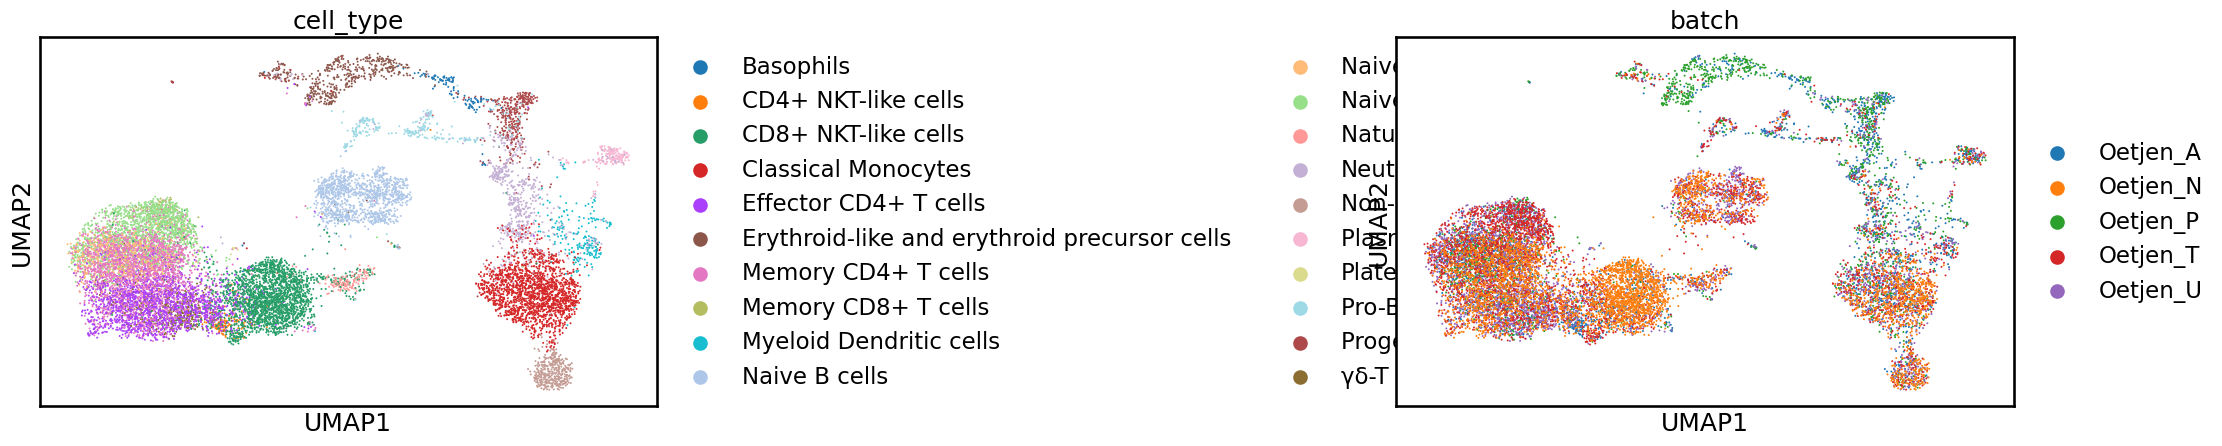

In [13]:
sc.tl.umap(adata_scvi)
sc.pl.umap(adata_scvi, color=["cell_type", "batch"], wspace=1)

In [14]:
metrics_scvi = scib.metrics.metrics(
        adata,
        adata_scvi,
        "batch", 
        "cell_type",
        embed="scVI",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_scvi

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep scVI
Compute neighbors on rep scVI
Compute neighbors on rep scVI
Compute neighbors on rep scVI
Compute neighbors on rep scVI
Isolated labels ASW...
Graph connectivity...


### [scANVI](https://github.com/scverse/scvi-tools)

In [15]:
# scANVI
adata_scANVI = adata_hvg.copy()

lvae = scvi.model.SCANVI.from_scvi_model(
    vae,
    adata=adata_scANVI,
    labels_key="cell_type",
    unlabeled_category="UnknownUnknown",
)
lvae.train(max_epochs=20, n_samples_per_label=100)
adata_scANVI.obsm["scANVI"] = lvae.get_latent_representation()

del lvae, vae
sc.pp.neighbors(adata_scANVI, use_rep="scANVI")

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Training for 20 epochs.                                                                                   


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 20/20: 100%|██████████| 20/20 [01:16<00:00,  3.82s/it, v_num=1, train_loss_step=1.34e+3, train_loss_epoch=1.37e+3]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [01:16<00:00,  3.83s/it, v_num=1, train_loss_step=1.34e+3, train_loss_epoch=1.37e+3]


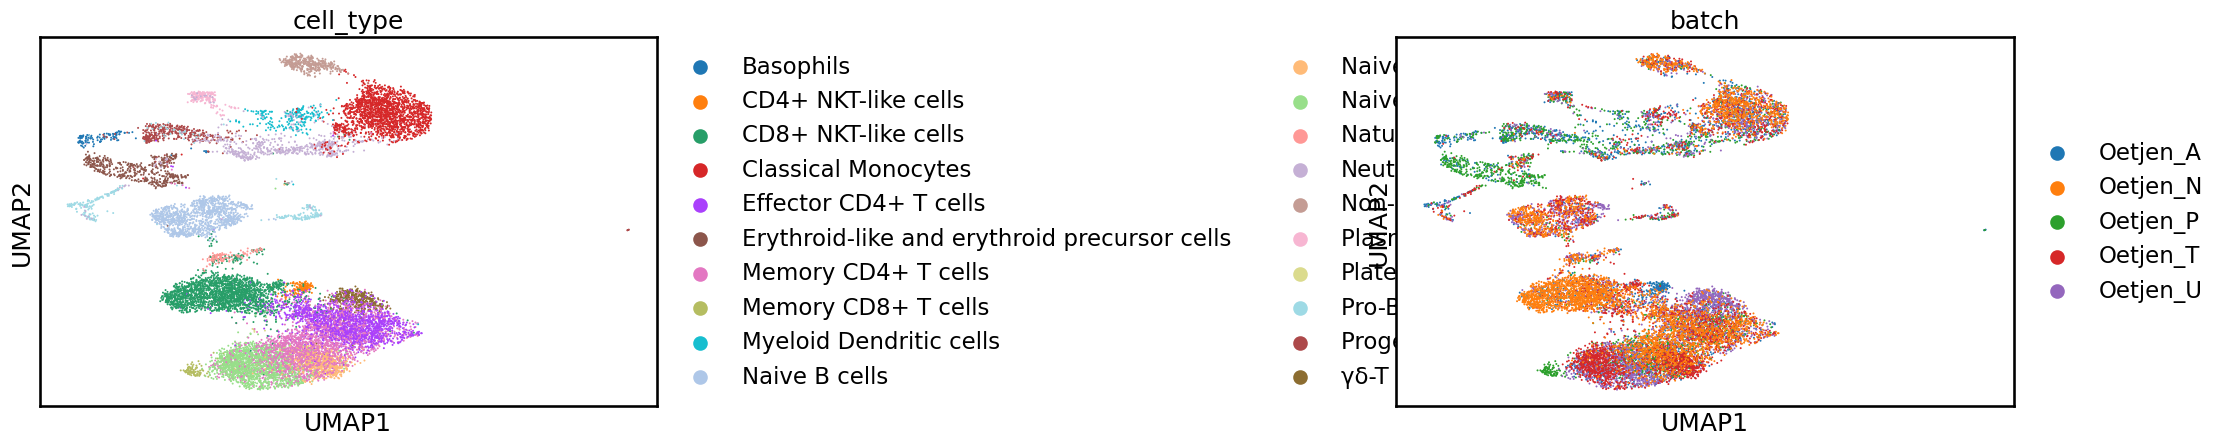

In [16]:
sc.tl.umap(adata_scANVI)
sc.pl.umap(adata_scANVI, color=["cell_type", "batch"], wspace=1)

In [17]:
metrics_scanvi = scib.metrics.metrics(
        adata,
        adata_scANVI,
        "batch", 
        "cell_type",
        embed="scANVI",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_scANVI

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep scANVI
Compute neighbors on rep scANVI
Compute neighbors on rep scANVI
Compute neighbors on rep scANVI
Compute neighbors on rep scANVI
Isolated labels ASW...
Graph connectivity...


### [scGen](https://github.com/theislab/scgen)

In [18]:
from scgen import SCGEN

adata_scgen = adata_hvg.copy()

SCGEN.setup_anndata(adata_scgen, batch_key="batch", labels_key="cell_type")
model = SCGEN(adata_scgen)
model.train(
    max_epochs=100,
    batch_size=128,
    early_stopping=True,
    early_stopping_patience=10,
)
corrected_adata = model.batch_removal()

adata_scgen.obsm["scGen"] = corrected_adata.obsm["corrected_latent"]

del corrected_adata
sc.pp.neighbors(adata_scgen, use_rep="scGen")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 13/100:  13%|█▎        | 13/100 [00:25<02:51,  1.97s/it, v_num=1, train_loss_step=131, train_loss_epoch=135]
Monitored metric elbo_validation did not improve in the last 10 records. Best score: 611.402. Signaling Trainer to stop.
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


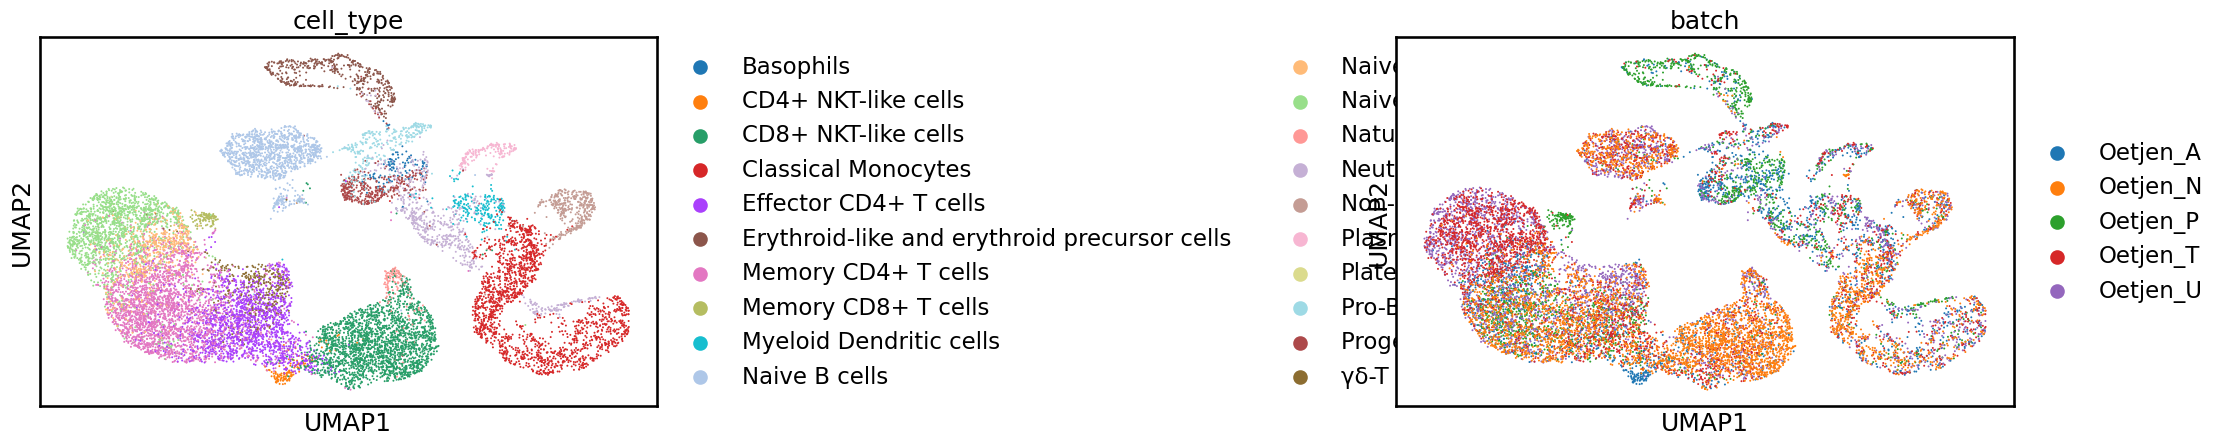

In [19]:
sc.tl.umap(adata_scgen)
sc.pl.umap(adata_scgen, color=["cell_type", "batch"], wspace=1)

In [20]:
metrics_scgen = scib.metrics.metrics(
        adata,
        adata_scgen,
        "batch", 
        "cell_type",
        embed="scGen",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_scgen

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep scGen
Compute neighbors on rep scGen
Compute neighbors on rep scGen
Compute neighbors on rep scGen
Compute neighbors on rep scGen
Isolated labels ASW...
Graph connectivity...


### [SAUCIE](https://github.com/KrishnaswamyLab/SAUCIE)

In [21]:
# Note: Pause for now. It requires a old version of tensorflow
'''import SAUCIE
import sklearn.decomposition

adata_saucie = adata_hvg.copy()

pca_op = sklearn.decomposition.PCA(100)
data = pca_op.fit_transform(adata_saucie.X)
saucie = SAUCIE.SAUCIE(100, lambda_b=0.1)
loader_train = SAUCIE.Loader(data, labels=adata_saucie.obs["batch"].cat.codes, shuffle=True)
loader_eval = SAUCIE.Loader(data, labels=adata_saucie.obs["batch"].cat.codes, shuffle=False)
saucie.train(loader_train, steps=5000)
adata_saucie.obsm["SAUCIE"] = saucie.get_reconstruction(loader_eval)[0]
#adata_saucie.X = pca_op.inverse_transform(adata_saucie.obsm["SAUCIE"])

sc.pp.neighbors(adata_saucie, use_rep="SAUCIE")'''

'import SAUCIE\nimport sklearn.decomposition\n\nadata_saucie = adata_hvg.copy()\n\npca_op = sklearn.decomposition.PCA(100)\ndata = pca_op.fit_transform(adata_saucie.X)\nsaucie = SAUCIE.SAUCIE(100, lambda_b=0.1)\nloader_train = SAUCIE.Loader(data, labels=adata_saucie.obs["batch"].cat.codes, shuffle=True)\nloader_eval = SAUCIE.Loader(data, labels=adata_saucie.obs["batch"].cat.codes, shuffle=False)\nsaucie.train(loader_train, steps=5000)\nadata_saucie.obsm["SAUCIE"] = saucie.get_reconstruction(loader_eval)[0]\n#adata_saucie.X = pca_op.inverse_transform(adata_saucie.obsm["SAUCIE"])\n\nsc.pp.neighbors(adata_saucie, use_rep="SAUCIE")'

### [ComBat](https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.combat.html)

In [22]:
adata_combat = adata_hvg.copy()
corrected_data = sc.pp.combat(adata_combat, key="batch", inplace=False)

adata_combat.obsm["ComBat"] = corrected_data

del corrected_data
sc.pp.neighbors(adata_combat, use_rep="ComBat")

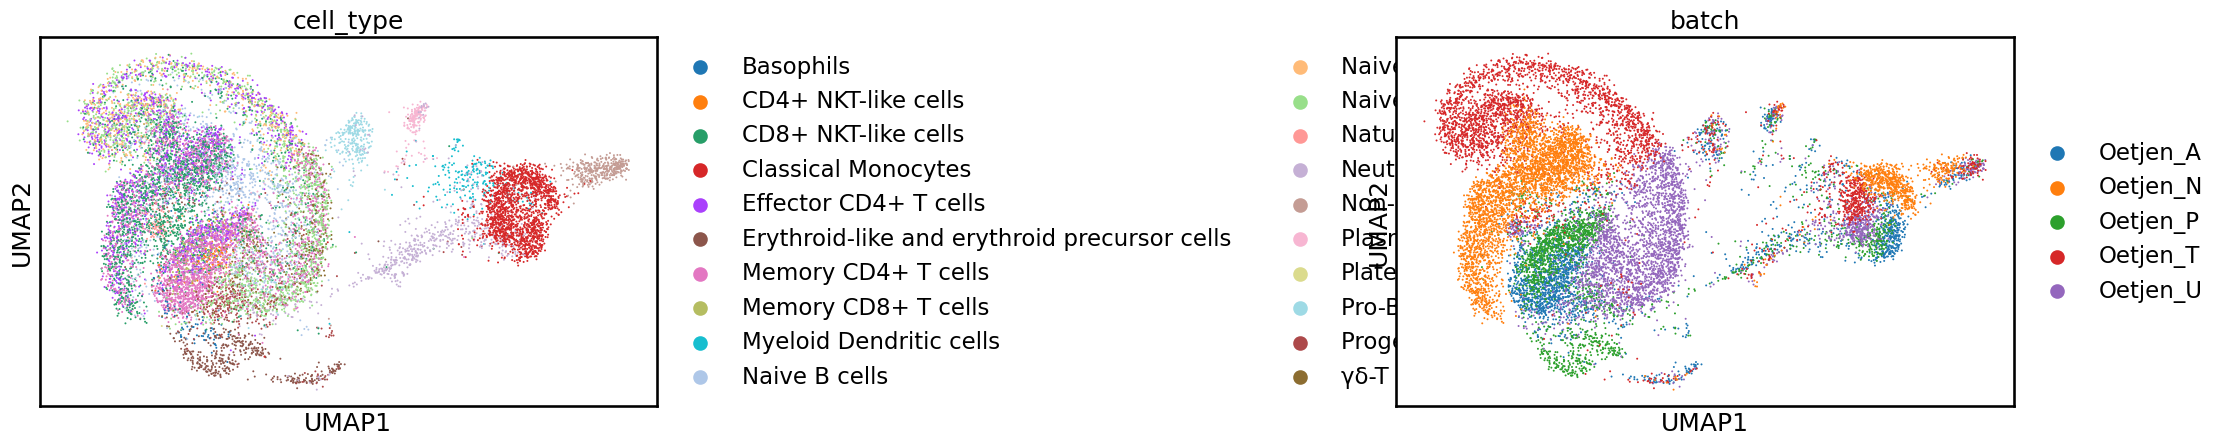

In [23]:
sc.tl.umap(adata_combat)
sc.pl.umap(adata_combat, color=["cell_type", "batch"], wspace=1)

In [24]:
metrics_combat = scib.metrics.metrics(
        adata,
        adata_combat,
        "batch", 
        "cell_type",
        embed="ComBat",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_combat

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep ComBat
Compute neighbors on rep ComBat
Compute neighbors on rep ComBat
Compute neighbors on rep ComBat
Compute neighbors on rep ComBat
Isolated labels ASW...
Graph connectivity...


### [DESC](https://github.com/eleozzr/desc)

In [25]:
import desc
import os

adata_desc = adata_hvg.copy()

adata_out = desc.scale_bygroup(adata_desc, groupby="batch", max_value=6)

adata_out = desc.train(
    adata_out,
    dims=[adata_desc.shape[1], 128, 32],
    tol=0.001,
    n_neighbors=10,
    batch_size=256,
    louvain_resolution=0.8,
    save_encoder_weights=False,
    #save_dir=tmp_dir,
    do_tsne=False,
    use_GPU=False,
    GPU_id=None,
    num_Cores=os.cpu_count(),
    use_ae_weights=False,
    do_umap=False,
)

adata_desc.obsm["DESC"] = adata_out.obsm["X_Embeded_z" + str(0.8)]

del adata_out
sc.pp.neighbors(adata_desc, use_rep="DESC")

Start to process resolution= 0.8
The number of cpu in your computer is 8
Create the directory:result_tmp to save result
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1
Epoch 1/50
58/58 [==============================] - 8s 32ms/step - loss: 0.9098
Epoch 2/50
58/58 [==============================] - 2s 31ms/step - loss: 0.8922
Epoch 3/50
58/58 [==============================] - 2s 32ms/step - loss: 0.8803
Epoch 4/50
58/58 [==============================] - 2s 32ms/step - loss: 0.8675
Epoch 5/50
58/58 [==============================] - 2s 34ms/step - loss: 0.8586
Epoch 6/50
58/58 [==============================] - 2s 41ms/step - loss: 0.8527
Epoch 7/50
58/58 [==============================] - 2s 32ms/step - loss: 0.8480
Epoch 8/50
58/58 [==============================] - 2s 32ms/step 

In [26]:
sc.tl.umap(adata_desc)
sc.pl.umap(adata_desc, color=["cell_type", "batch"], wspace=1)

In [27]:
metrics_desc = scib.metrics.metrics(
        adata,
        adata_desc,
        "batch", 
        "cell_type",
        embed="DESC",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_desc

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep DESC
Compute neighbors on rep DESC
Compute neighbors on rep DESC
Compute neighbors on rep DESC
Compute neighbors on rep DESC
Isolated labels ASW...
Graph connectivity...


### [trVAE](https://github.com/theislab/trvaep)

In [28]:
# Note: Too memory expensive to run / Too slow
'''import trvaep

adata_trvae = adata_hvg.copy()
n_batches = adata_trvae.obs["batch"].nunique()

model = trvaep.CVAE(
    adata_trvae.n_vars,
    num_classes=n_batches,
    encoder_layer_sizes=[64, 32],
    decoder_layer_sizes=[32, 64],
    latent_dim=10,
    alpha=0.0001,
    use_mmd=True,
    beta=1,
    output_activation="ReLU",
)

# Note: set seed for reproducibility of results
trainer = trvaep.Trainer(model, adata_trvae, condition_key="batch", seed=42)

trainer.train_trvae(300, 64, early_patience=50) #1024

# Get the dominant batch covariate
main_batch = adata_trvae.obs["batch"].value_counts().idxmax()

# Get latent representation
latent_y = model.get_y(
    adata_trvae.X,
    c=model.label_encoder.transform(np.tile(np.array([main_batch]), len(adata_trvae))),
)
adata_trvae.obsm["trvaep"] = latent_y

# Get reconstructed feature space:
#data = model.predict(x=adata_trvae.X, y=adata_trvae.obs["batch"].tolist(), target=main_batch)
#adata_trvae.X = data'''

'import trvaep\n\nadata_trvae = adata_hvg.copy()\nn_batches = adata_trvae.obs["batch"].nunique()\n\nmodel = trvaep.CVAE(\n    adata_trvae.n_vars,\n    num_classes=n_batches,\n    encoder_layer_sizes=[64, 32],\n    decoder_layer_sizes=[32, 64],\n    latent_dim=10,\n    alpha=0.0001,\n    use_mmd=True,\n    beta=1,\n    output_activation="ReLU",\n)\n\n# Note: set seed for reproducibility of results\ntrainer = trvaep.Trainer(model, adata_trvae, condition_key="batch", seed=42)\n\ntrainer.train_trvae(300, 64, early_patience=50) #1024\n\n# Get the dominant batch covariate\nmain_batch = adata_trvae.obs["batch"].value_counts().idxmax()\n\n# Get latent representation\nlatent_y = model.get_y(\n    adata_trvae.X,\n    c=model.label_encoder.transform(np.tile(np.array([main_batch]), len(adata_trvae))),\n)\nadata_trvae.obsm["trvaep"] = latent_y\n\n# Get reconstructed feature space:\n#data = model.predict(x=adata_trvae.X, y=adata_trvae.obs["batch"].tolist(), target=main_batch)\n#adata_trvae.X = data'

### [FastMNN](https://github.com/chriscainx/mnnpy)

In [29]:
#Note: Could not manage to install it
'''adata_mnn = adata_hvg.copy()

data_mnn = []
for i in adata_mnn.obs["batch"].cat.categories:
    data_mnn.append(adata_mnn[adata_mnn.obs["batch"] == i].copy())

corrected, _, _ = sc.external.pp.mnn_correct(
    *data_mnn,
    batch_key="batch",
    batch_categories=adata_mnn.obs["batch"].cat.categories,
    index_unique=None,
)

print(corrected.shape)
print(corrected)

adata_mnn.obsm["FastMNN"] = corrected

sc.pp.neighbors(adata_mnn, use_rep="FastMNN")'''

'adata_mnn = adata_hvg.copy()\n\ndata_mnn = []\nfor i in adata_mnn.obs["batch"].cat.categories:\n    data_mnn.append(adata_mnn[adata_mnn.obs["batch"] == i].copy())\n\ncorrected, _, _ = sc.external.pp.mnn_correct(\n    *data_mnn,\n    batch_key="batch",\n    batch_categories=adata_mnn.obs["batch"].cat.categories,\n    index_unique=None,\n)\n\nprint(corrected.shape)\nprint(corrected)\n\nadata_mnn.obsm["FastMNN"] = corrected\n\nsc.pp.neighbors(adata_mnn, use_rep="FastMNN")'

### [BBKNN](https://github.com/Teichlab/bbknn)

In [30]:
import bbknn

adata_bbknn = adata_hvg.copy()
sc.pp.pca(adata_bbknn, svd_solver="arpack")
corrected = bbknn.bbknn(adata_bbknn, batch_key="batch", copy=True)
adata_bbknn.obsm["BBKNN"] = corrected.X

del corrected
sc.pp.neighbors(adata_bbknn, use_rep="BBKNN")


In [31]:
sc.tl.umap(adata_bbknn)
sc.pl.umap(adata_bbknn, color=["cell_type", "batch"], wspace=1)

In [32]:
metrics_bbknn = scib.metrics.metrics(
        adata,
        adata_bbknn,
        "batch", 
        "cell_type",
        embed="BBKNN",
        isolated_labels_asw_=True,
        silhouette_=True,
        hvg_score_=True,
        graph_conn_=True,
        pcr_=True,
        isolated_labels_f1_=True,
        trajectory_=False,
        nmi_=True,
        ari_=True,
        cell_cycle_=True,
        kBET_=False,
        ilisi_=False,
        clisi_=False,
        organism="human",
    )

del adata_bbknn

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep BBKNN
Compute neighbors on rep BBKNN
Compute neighbors on rep BBKNN
Compute neighbors on rep BBKNN
Compute neighbors on rep BBKNN
Isolated labels ASW...
Graph connectivity...


### [TOSICA](https://github.com/JackieHanLab/TOSICA/tree/main)

In [33]:
# TOSICA

### In-house model

In [34]:
# In-house model

### Visualize

In [35]:
metrics = pd.concat([metrics_scanorama, metrics_scvi, metrics_scanvi, metrics_harmony, metrics_scgen, metrics_combat, metrics_desc, metrics_bbknn, metrics_hvg], axis="columns")

metrics = metrics.set_axis(["Scanorama", "scVI", "scANVI", "Harmony", "scGen", "ComBat", "DESC", "BBKNN", "Unintegrated"], axis="columns")

metrics = metrics.loc[
    [
        "ASW_label",
        "ASW_label/batch",
        "PCR_batch",
        "isolated_label_silhouette",
        "graph_conn",
        "hvg_overlap",
        "NMI_cluster/label",
        "ARI_cluster/label",
        "cell_cycle_conservation",
        "isolated_label_F1"
    ],
    :,
]

metrics = metrics.T
metrics = metrics.drop(columns=["hvg_overlap"])
metrics

,ASW_label,ASW_label/batch,PCR_batch,isolated_label_silhouette,graph_conn,NMI_cluster/label,ARI_cluster/label,cell_cycle_conservation,isolated_label_F1
Scanorama,0.540222,0.946646,0.625451,0.531499,0.943065,0.732030,0.524444,0.824772,0.189651
scVI,0.527027,0.935614,0.931068,0.568111,0.960800,0.723762,0.536799,0.471863,0.331895
scANVI,0.552321,0.928304,0.812632,0.619091,0.985200,0.773047,0.608162,0.602905,0.601561
Harmony,0.533624,0.913250,0.784066,0.528264,0.925895,0.726179,0.530384,0.857913,0.181998
scGen,0.600648,0.888775,0.756169,0.593456,0.936174,0.756372,0.614241,0.712852,0.500616
ComBat,0.474069,0.960830,0.999330,0.471472,0.623494,0.469319,0.215261,0.757905,0.118186
DESC,0.535745,0.689148,0.719232,0.367767,0.794190,0.703291,0.492769,0.562010,0.150885
BBKNN,0.477757,0.955582,0.335975,0.484233,0.801950,0.619585,0.309131,0.817991,0.178483
Unintegrated,0.544224,0.881558,0.335975,0.589187,0.949449,0.718618,0.517628,0.817991,0.343246


In [36]:
metrics["Overall Batch"] = metrics[["ASW_label/batch", "PCR_batch", "graph_conn"]].mean(axis=1)
metrics["Overall Bio"] = metrics[["ASW_label", 
                                  "isolated_label_silhouette", 
                                  "NMI_cluster/label", 
                                  "ARI_cluster/label",
                                  "isolated_label_F1",
                                  "cell_cycle_conservation"]].mean(axis=1)
metrics["Overall"] = 0.4 * metrics["Overall Batch"] + 0.6 * metrics["Overall Bio"] # priorities biology slightly more
metrics = metrics.sort_values(by='Overall', ascending=False)
metrics.style.background_gradient(cmap="Blues")

,ASW_label,ASW_label/batch,PCR_batch,isolated_label_silhouette,graph_conn,NMI_cluster/label,ARI_cluster/label,cell_cycle_conservation,isolated_label_F1,Overall Batch,Overall Bio,Overall
scANVI,0.552321,0.928304,0.812632,0.619091,0.985200,0.773047,0.608162,0.602905,0.601561,0.908712,0.626181,0.739194
scGen,0.600648,0.888775,0.756169,0.593456,0.936174,0.756372,0.614241,0.712852,0.500616,0.860373,0.629698,0.721968
scVI,0.527027,0.935614,0.931068,0.568111,0.960800,0.723762,0.536799,0.471863,0.331895,0.942494,0.526576,0.692943
Harmony,0.533624,0.913250,0.784066,0.528264,0.925895,0.726179,0.530384,0.857913,0.181998,0.874404,0.559727,0.685598
Scanorama,0.540222,0.946646,0.625451,0.531499,0.943065,0.732030,0.524444,0.824772,0.189651,0.838388,0.557103,0.669617
Unintegrated,0.544224,0.881558,0.335975,0.589187,0.949449,0.718618,0.517628,0.817991,0.343246,0.722327,0.588482,0.642020
ComBat,0.474069,0.960830,0.999330,0.471472,0.623494,0.469319,0.215261,0.757905,0.118186,0.861218,0.417702,0.595108
DESC,0.535745,0.689148,0.719232,0.367767,0.794190,0.703291,0.492769,0.562010,0.150885,0.734190,0.468744,0.574923
BBKNN,0.477757,0.955582,0.335975,0.484233,0.801950,0.619585,0.309131,0.817991,0.178483,0.697836,0.481196,0.567852


In [38]:
# Download as CSV
metrics.to_csv('Benchmark_results.csv', index=True, header=True)